In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
from patsy import bs, dmatrix # Splines
from statsmodels.nonparametric.smoothers_lowess import lowess # Local Regression

In [2]:
df = pd.read_csv('wage.csv')
df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [4]:
# Find Null values in dataset
df.isnull().sum()

Unnamed: 0    0
year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [5]:
# Object columns:
object_col = df.dtypes == object
object_col[object_col == True].index

Index(['sex', 'maritl', 'race', 'education', 'region', 'jobclass', 'health',
       'health_ins'],
      dtype='object')

In [6]:
df[object_col[object_col == True].index].head()

,sex,maritl,race,education,region,jobclass,health,health_ins
0,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No
1,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No
2,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes
3,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes
4,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes


In [7]:
df[object_col[object_col == True].index].describe()
# 3 of object type columns have 2 uniques variable
# sex column only has 1 variable
# maritl and education have 5 variables
# race has 4 variables
# We have to convert them into numeric variable if we want to use them later on

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


### Polynomial Regression and Step Functions

In [8]:
# Define a 5th order polynomial function
poly_order = 4 
poly = 'wage ~ 1 +' + '+'.join(['I(age**{})'.format(i) for i in np.arange(1, poly_order + 1)])

print(poly)

# Define the model
model_poly = smf.ols(poly, data=df[['age', 'wage']])

# Fit the model
result_poly = model_poly.fit()

# Summary of fitted model
result_poly.summary()

wage ~ 1 +I(age**1)+I(age**2)+I(age**3)+I(age**4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           2.77e-57
Time:                        06:38:01   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -184.1542     60.040     -3.067      0.002    -301.879     -66.430
I(age ** 1)    21.2455      5.887      3.609      0.000       9.703      32.788
I(age ** 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
I(age ** 3)     0.0068      0.003      2.221      0.026       0.001       0.013
I(age ** 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
table, data, col_names = summary_table(result_poly, alpha=0.05)

# Print column name of summary table
print(col_names)

# Array of fitted values
fitted_val = result_poly.fittedvalues.values

# Predicted, We can use this:
predicted_1 = data[:, 2].T

# Or use predict method:
#age_range = np.linspace(df['age'].min(), df['age'].max(), 1000)
#predicted_2 = model_poly.predict(age_range)

# predict low confidence interval
low_ci = data[:, 4].T

# predict high confidence interval
high_ci = data[:, 5].T

# Dataframe of Fitted values, residuals and studentized residuals
df_r = pd.DataFrame({'Predicted': predicted_1, 'low_ci': low_ci, 'high_ci': high_ci} )

['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


In [10]:
df_r['age'] = df['age']
df_r.sort_values(by = 'age', axis = 0, inplace = True)

<IPython.core.display.Javascript object>


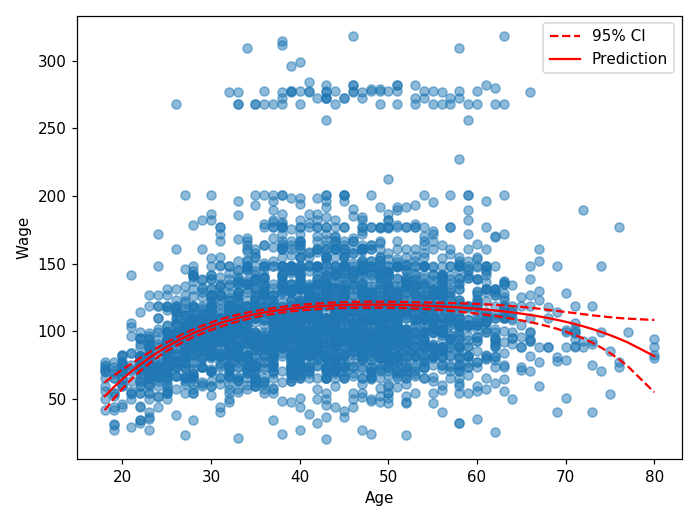

In [11]:
%matplotlib notebook
plt.scatter(df['age'], df['wage'], alpha = 0.5)
plt.plot(df_r['age'], df_r['high_ci'], color = 'r', linestyle = '--', label = '95% CI')
plt.plot(df_r['age'], df_r['Predicted'], color = 'r', label = 'Prediction')
plt.plot(df_r['age'], df_r['low_ci'], color = 'r', linestyle = '--')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Wage')
plt.tight_layout()
plt.savefig('4th_order_poly_regression_wage_vs_age.png', dpi = 100)

### ANOVA

In [12]:
"""In performing a polynomial regression we must decide on the degree of
the polynomial to use. One way to do this is by using hypothesis tests. We
now fit models ranging from linear to a degree-5 polynomial and seek to
determine the simplest model which is sufficient to explain the relationship"""
poly_result = []
for poly_order in [1,2,3,4,5]:
    poly_formula = 'wage ~ 1 +' + '+'.join(['I(age**{})'.format(i) for i in np.arange(1, poly_order + 1)])
    # Define the model and fit it
    poly_result.append(smf.ols(poly_formula, data=df[['age', 'wage']]).fit())

In [13]:
# Using ANOVA to compare models
sm.stats.anova_lm(*poly_result)

C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [14]:
# 4th order polynomial shows P-value of 0.05 which is acceptable but
# 5th order P-value is 0.37. So we can go with a 4th order. 

### Logistic Regression Model

In [15]:
"""Next we consider the task of predicting whether an individual earns more
than $250,000 per year."""

# Convert wage column into a binary column, wage > 250k is 1, else 0.
df['High_wage'] = df.wage.apply(lambda x: 1.0 if x > 250 else 0.0)

# Create 4th order polynomial formula
poly_order = 4
formula = 'High_wage ~ 1 +' + '+'.join(['I(age**{})'.format(i) for i in np.arange(1, poly_order + 1)])

# Create Logistic regression model
LR_model = smf.logit(formula, data=df)

# Fit the model
LR_result = LR_model.fit()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


In [16]:
# Predict 
age_list = np.linspace(df['age'].min(), df['age'].max(), 1000)
LR_predictions = LR_result.predict(exog = dict(age = age_list))

In [17]:
LR_result.cov_params()

,Intercept,I(age ** 1),I(age ** 2),I(age ** 3),I(age ** 4)
Intercept,2271.025387,-199.041913,6.389460,-8.913645e-02,4.566150e-04
I(age ** 1),-199.041913,17.530146,-0.565338,7.920970e-03,-4.074065e-05
I(age ** 2),6.389460,-0.565338,0.018313,-2.576816e-04,1.330717e-06
I(age ** 3),-0.089136,0.007921,-0.000258,3.640801e-06,-1.887688e-08
I(age ** 4),0.000457,-0.000041,0.000001,-1.887688e-08,9.825539e-11


In [18]:
# Construct Standard Error (SE) of the Model
# SE is squared-root of Var f(x0) = β0 + β1 x0 + β2 x0^2 + β3 x0^3 + β4 x0^4
# x0 is age
# Var f(x0) is L^T C L where L is (1, x0, x0^2, x0^3, x0^4) and C in Covariance matrix
SE = []
for age in age_list:
    L = np.array([[1, age, age**2, age**3, age**4]])
    right = np.dot(LR_result.cov_params(), L.T)
    var = np.dot(L, right)
    SE = np.append(SE, np.sqrt(var))

In [19]:
# To find 95 % confidence interval

# 1st: Critical Values of the Student's t Distribution times SE
width = stats.t.isf(.05/2,len(df)) * SE

# 2nd: Linear fit values
Linear_fit = LR_result.predict(exog=dict(age=age_list), linear=True)

# 3rd: Adding width to each linear fit value
upper = Linear_fit + width
lower = Linear_fit - width

# 4th: Plug into Link function
upper_val = np.exp(upper)/(1+np.exp(upper))
lower_val = np.exp(lower)/(1+np.exp(lower))

<IPython.core.display.Javascript object>


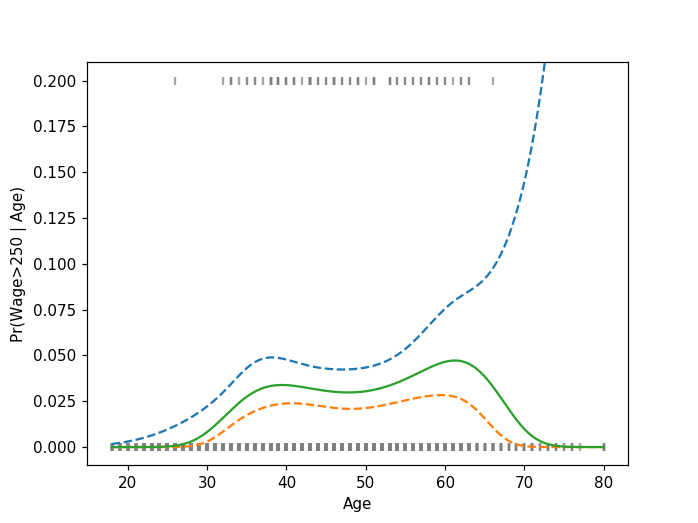

In [20]:
%matplotlib notebook
plt.scatter(df.age, df.High_wage/5, s=30, c='grey', marker='|', alpha=0.7)
plt.plot(age_list, upper_val, label = '95% CI',linestyle = '--')
plt.plot(age_list, lower_val,linestyle = '--')
plt.plot(age_list, LR_predictions, label = 'Prediction')
plt.ylim(-0.01, 0.21)
plt.xlabel('Age')
plt.ylabel('Pr(Wage>250 | Age)')
plt.savefig('Logistic_Regression.png', dpi = 500)

### Splines

In [21]:
# 1st: generating cubic spline with 3 age knots at 25, 40 and 60.
dataset_k3 = dmatrix("bs(age, knots=(25,40, 60), degree=3, include_intercept=False)", 
                        data={"age":df.age},return_type='dataframe')

print('Degrees of freedom: {}'.format(dataset_k3.shape[1])) # Cubic spline with k knots has 3 + 4 degrees of freedom 
dataset_k3.head()

Degrees of freedom: 7


,Intercept,"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.559911,0.403778,0.033395,0.000000,0.000000,0.0
2,1.0,0.000000,0.114796,0.618564,0.262733,0.003906,0.0
3,1.0,0.000000,0.167109,0.633167,0.198880,0.000844,0.0
4,1.0,0.000000,0.034014,0.508194,0.426542,0.031250,0.0


In [24]:
# 2nd: Fitting GLM (Generalised linear model) on generated 3-knots dataset
results_k3 = sm.GLM(df.wage, dataset_k3).fit()

#3rd: Predict wage values, we will predict on new values of age

# 3rd-a
age_list = np.linspace(df['age'].min(), df['age'].max(), 1000)


#3rd-b
dataset_k3_new = dmatrix("bs(age_list, knots=(25,40,60), degree=3, include_intercept=False)",
                             data = {"age_list": age_list}, return_type='dataframe')

# 3rd-c
predict_k3 = results_k3.predict(dataset_k3_new)

In [25]:
# Lets have a look at rows of dataset_k3_new. We will use them in confidence interval calculation:
dataset_k3_new.values[:2] # Each row has 7 parameters correspond to 7 degrees of freedom

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.62881644e-02, 7.47038458e-05, 3.69580112e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [26]:
def CI(dataset, results): # Find confidence interval
    
    # Makeing prediction on dataset 
    prediction = results.predict(dataset)
    
    # Construct Standard Error (SE) of the Model
    # SE is squared-root of Var f(x0) = terms of Splines that are in row of dataset_k3_new
    # Var f(x0) is L^T C L where L is row of dataset_k3_new and C in Covariance matrix
    
    SE = np.array([])
    for L in dataset.values:
        
        right = np.dot(results.cov_params(), L.T)
        var = np.dot(L, right)
        SE = np.append(SE, np.sqrt(var))
    # To find 95 % confidence interval

    # 1st: Critical Values of the Student's t Distribution times SE
    width = stats.t.isf(.05/2,len(df)) * SE

    # 2nd: Adding width to each predicted value
    upper = prediction + width
    lower = prediction - width
    
    return upper, lower

In [27]:
upper_ci, lower_ci = CI(dataset_k3_new, results_k3)

<IPython.core.display.Javascript object>


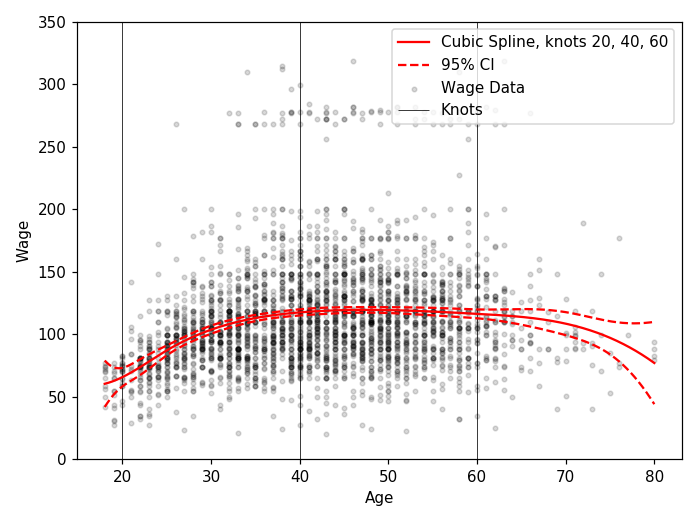

In [28]:
%matplotlib notebook
y_min, y_max = 0, 350
plt.scatter(df.age, df.wage, alpha = 0.15, label = 'Wage Data', color = 'k', marker = '.')
plt.plot(age_list, predict_k3, label = 'Cubic Spline, knots 20, 40, 60', color = 'r')
plt.plot(age_list, upper_ci, linestyle = '--', label = '95% CI', color = 'r')
plt.plot(age_list, lower_ci,  linestyle = '--', color = 'r')
plt.vlines([20, 40, 60], ymin = y_min, ymax = y_max, linestyle = '-', linewidth = 0.5, label = 'Knots')
plt.ylim(y_min, y_max)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Wage')
plt.tight_layout()
plt.savefig('Cubic_Splines_knots.png', dpi = 100)

### Natural Spline

In [29]:
# 1st: generating cubic spline with 4 degrees of freedom
dataset_k_ns = dmatrix("cr(age, df=4)", data={"age":df.age},return_type='dataframe')
print('Degrees of freedom: {}'.format(dataset_k_ns.shape[1])) # 4 degrees of freedom + 1 intercept

Degrees of freedom: 5


In [30]:
# 2nd: Fitting GLM (Generalised linear model) on generated dataset
results_k_ns = sm.GLM(df.wage, dataset_k_ns).fit()

#3rd: Predict wage values, we will predict on new values of age

# 3rd-a
age_list = np.linspace(df['age'].min(), df['age'].max(), 1000)


#3rd-b
dataset_k_ns_new = dmatrix("cr(age_list, df=4)", data = {"age_list": age_list}, return_type='dataframe')

# 3rd-c
predict_k_ns = results_k_ns.predict(dataset_k_ns_new)

In [31]:
upper_ci_ns, lower_ci_ns = CI(dataset_k_ns_new, results_k_ns)

<IPython.core.display.Javascript object>


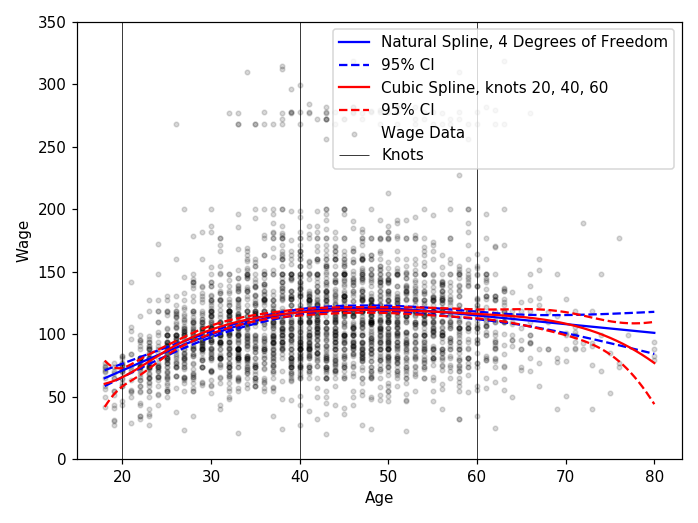

In [32]:
%matplotlib notebook
y_min, y_max = 0, 350
plt.scatter(df.age, df.wage, alpha = 0.15, label = 'Wage Data', color = 'k', marker = '.')

plt.plot(age_list, predict_k_ns, label = 'Natural Spline, 4 Degrees of Freedom', color = 'b')
plt.plot(age_list, upper_ci_ns, linestyle = '--', label = '95% CI', color = 'b')
plt.plot(age_list, lower_ci_ns,  linestyle = '--', color = 'b')

plt.plot(age_list, predict_k3, label = 'Cubic Spline, knots 20, 40, 60', color = 'r')
plt.plot(age_list, upper_ci, linestyle = '--', label = '95% CI', color = 'r')
plt.plot(age_list, lower_ci,  linestyle = '--', color = 'r')
plt.vlines([20, 40, 60], ymin = y_min, ymax = y_max, linestyle = '-', linewidth = 0.5, label = 'Knots')
plt.ylim(y_min, y_max)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Wage')
plt.tight_layout()
plt.savefig('Cubic_Splines_and_natural_splines.png', dpi = 100)

### Local regression

In [33]:
"""local linear regression using spans of 0.2 and 0.5:
that is, each neighborhood consists of 20% or 50% of the observations"""
prediction_20 = lowess(df.wage, df.age, frac=0.2, delta=0)
prediction_50 = lowess(df.wage, df.age, frac=0.5, delta=0)

In [34]:
prediction_20[:,1]

array([58.4833787 , 58.4833787 , 58.4833787 , ..., 83.84164611,
       83.84164611, 83.84164611])

<IPython.core.display.Javascript object>


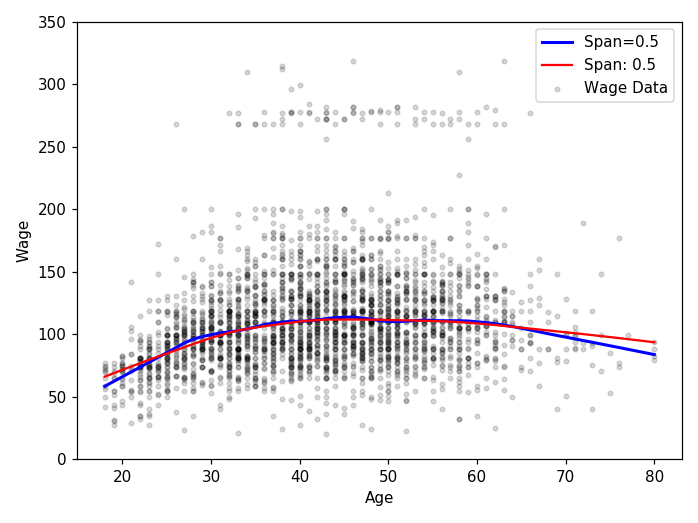

In [35]:
%matplotlib notebook
y_min, y_max = 0, 350
plt.scatter(df.age, df.wage, alpha = 0.15, label = 'Wage Data', color = 'k', marker = '.')
plt.plot(np.sort(df.age), prediction_20[:,1], 'b-', lw=2, label='Span=0.5')
plt.plot(np.sort(df.age), prediction_50[:,1], label = 'Span: 0.5', color = 'r')

plt.ylim(y_min, y_max)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Wage')
plt.tight_layout()
plt.savefig('Local_Regression_20_50_percent.png', dpi = 100)

### Generalized Additive Models

In [38]:
"""We now fit a GAM to predict wage using natural spline functions of year
and age, treating education as a qualitative predictor"""

# 1st Construct Patsy Design Matrix, 
# Note that 'center' constraints makes a zero mean for the smooth functions f(year) and f(age)
dataset_dm = dmatrix("cr(year, df=4, constraints='center') + cr(age, df=5, constraints='center') + education",
                 data={"year":df.year, "age":df.age, "education":df.education}, return_type="dataframe")

# 2nd Creat and fit linear regression model 
GA_model = sm.OLS(df.wage, exog = dataset_dm).fit()

In [39]:
# Check the summary of the model
GA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     95.22
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          1.55e-213
Time:                        06:57:46   Log-Likelihood:                -14930.
No. Observations:                3000   AIC:                         2.989e+04
Df Residuals:                    2986   BIC:                         2.997e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  85.4759      2.155     39.668      0.000      81.251      89.701
education[T.2. HS Grad]                    10.9574      2.430      4.509      0.000       6.193      15.722
education[T.3. Some College]               23.4431      2.562      9.152      0.000      18.420      28.466
education[T.4. College Grad]               38.2330      2.546     15.015      0.000      33.240      43.226
education[T.5. Advanced Degree]            62.4786      2.761     22.626      0.000      57.064      67.893
cr(year, df=4, constraints='center')[0]    -0.0548      1.540     -0.036      0.972      -3.075       2.965
cr(year, df=4, constraints='center')[1]     3.6194      1.504      2.407      0.016       0.671       6.567
cr(year, df=4, constraints='center')[2]     2.2938      1.565      1.466      0.143      -0.775       5.363
cr(year, df=4, constraints='center')[3]     4.5342      1.713      2.647      0.008       1.176       7.893
cr(age, df=5, constraints='center')[0]      7.7241      2.640      2.926      0.003       2.548      12.900
cr(age, df=5, constraints='center')[1]     31.0975      2.688     11.567      0.000      25.826      36.369
cr(age, df=5, constraints='center')[2]     20.7737      2.490      8.342      0.000      15.891      25.656
cr(age, df=5, constraints='center')[3]      6.1212      2.866      2.136      0.033       0.501      11.741
cr(age, df=5, constraints='center')[4]    -28.3309     11.298     -2.508      0.012     -50.483      -6.179
==============================================================================
Omnibus:                     1032.791   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5516.646
Skew:                           1.545   Prob(JB):                         0.00
Kurtosis:                       8.881   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot f(year)

In [41]:
# Lets get coefficients of fitted parameters
GA_model.params

Intercept                                  85.475913
education[T.2. HS Grad]                    10.957379
education[T.3. Some College]               23.443096
education[T.4. College Grad]               38.232950
education[T.5. Advanced Degree]            62.478611
cr(year, df=4, constraints='center')[0]    -0.054821
cr(year, df=4, constraints='center')[1]     3.619381
cr(year, df=4, constraints='center')[2]     2.293793
cr(year, df=4, constraints='center')[3]     4.534247
cr(age, df=5, constraints='center')[0]      7.724121
cr(age, df=5, constraints='center')[1]     31.097522
cr(age, df=5, constraints='center')[2]     20.773680
cr(age, df=5, constraints='center')[3]      6.121194
cr(age, df=5, constraints='center')[4]    -28.330884
dtype: float64

In [43]:
f_coeff = GA_model.params[5:9]

In [44]:
f_coeff

cr(year, df=4, constraints='center')[0]   -0.054821
cr(year, df=4, constraints='center')[1]    3.619381
cr(year, df=4, constraints='center')[2]    2.293793
cr(year, df=4, constraints='center')[3]    4.534247
dtype: float64

In [46]:
# Lets get columns of design matrix corresponds to f(year)
dataset_dm.columns

Index(['Intercept', 'education[T.2. HS Grad]', 'education[T.3. Some College]',
       'education[T.4. College Grad]', 'education[T.5. Advanced Degree]',
       'cr(year, df=4, constraints='center')[0]',
       'cr(year, df=4, constraints='center')[1]',
       'cr(year, df=4, constraints='center')[2]',
       'cr(year, df=4, constraints='center')[3]',
       'cr(age, df=5, constraints='center')[0]',
       'cr(age, df=5, constraints='center')[1]',
       'cr(age, df=5, constraints='center')[2]',
       'cr(age, df=5, constraints='center')[3]',
       'cr(age, df=5, constraints='center')[4]'],
      dtype='object')

In [53]:
df_year_col = dataset_dm.columns[5:9].tolist()
df_year_col

["cr(year, df=4, constraints='center')[0]",
 "cr(year, df=4, constraints='center')[1]",
 "cr(year, df=4, constraints='center')[2]",
 "cr(year, df=4, constraints='center')[3]"]

In [60]:
df_year = dataset_dm[df_year_col]
df_year.head()

,"cr(year, df=4, constraints='center')[0]","cr(year, df=4, constraints='center')[1]","cr(year, df=4, constraints='center')[2]","cr(year, df=4, constraints='center')[3]"
0,-0.163729,0.875408,-0.134574,-0.098130
1,0.589322,-0.388702,-0.208715,-0.187743
2,-0.556162,-0.423217,-0.457127,-0.333333
3,-0.556162,-0.423217,-0.457127,-0.333333
4,0.593776,0.256291,-0.227666,-0.087802


In [61]:
df_year['Fit Line'] = np.dot(df_year.values, f_coeff)

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_year['Year'] = df.year
# Sort fit data by year
df_year.sort_values(by = 'Year', inplace = True)
df_year

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,"cr(year, df=4, constraints='center')[0]","cr(year, df=4, constraints='center')[1]","cr(year, df=4, constraints='center')[2]","cr(year, df=4, constraints='center')[3]",Fit Line,Year
807,-0.556162,-0.423217,-0.457127,-0.333333,-4.061266,2003
788,-0.556162,-0.423217,-0.457127,-0.333333,-4.061266,2003
747,-0.556162,-0.423217,-0.457127,-0.333333,-4.061266,2003
751,-0.556162,-0.423217,-0.457127,-0.333333,-4.061266,2003
2333,-0.556162,-0.423217,-0.457127,-0.333333,-4.061266,2003
...,...,...,...,...,...,...
737,-0.128956,-0.098130,-0.105993,0.922711,3.592571,2009
2345,-0.128956,-0.098130,-0.105993,0.922711,3.592571,2009
735,-0.128956,-0.098130,-0.105993,0.922711,3.592571,2009
2197,-0.128956,-0.098130,-0.105993,0.922711,3.592571,2009


<IPython.core.display.Javascript object>


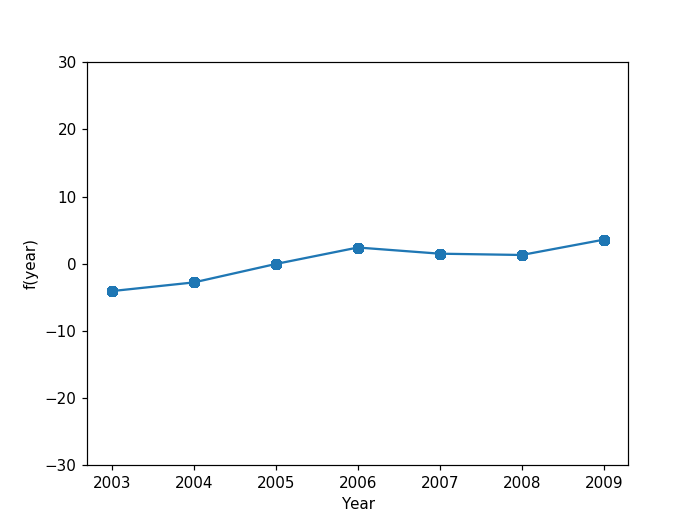

In [79]:
%matplotlib notebook
plt.plot(df_year['Year'], df_year['Fit Line'], marker = 'o')
plt.ylim(-30, 30)
plt.xlabel('Year')
plt.ylabel('f(year)')
plt.savefig('f_year.png', dpi = 100)

#### Plot f(age)

In [81]:
f_age_coeff = GA_model.params[9:]
df_age_col = dataset_dm.columns[9:].tolist()

In [82]:
df_age = dataset_dm[df_age_col]
df_age.head()

,"cr(age, df=5, constraints='center')[0]","cr(age, df=5, constraints='center')[1]","cr(age, df=5, constraints='center')[2]","cr(age, df=5, constraints='center')[3]","cr(age, df=5, constraints='center')[4]"
0,-0.501258,-0.695111,-0.500457,-0.097924,-0.005629
1,0.400144,-0.615868,-0.284361,-0.074217,-0.002268
2,-0.442366,0.425086,-0.060139,-0.123961,0.004613
3,-0.381726,0.529486,-0.252171,-0.081935,-0.001216
4,-0.375444,-0.024413,0.505666,-0.175527,0.013195


In [83]:
df_age['Fit Line'] = np.dot(df_age.values, f_age_coeff)

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df_age['Age'] = df.age

# Sort fit data by age
df_age.sort_values(by = 'Age', inplace = True)
df_age.head()

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,"cr(age, df=5, constraints='center')[0]","cr(age, df=5, constraints='center')[1]","cr(age, df=5, constraints='center')[2]","cr(age, df=5, constraints='center')[3]","cr(age, df=5, constraints='center')[4]",Fit Line,Age
0,-0.501258,-0.695111,-0.500457,-0.097924,-0.005629,-36.324278,18
820,-0.501258,-0.695111,-0.500457,-0.097924,-0.005629,-36.324278,18
29,-0.501258,-0.695111,-0.500457,-0.097924,-0.005629,-36.324278,18
2327,-0.501258,-0.695111,-0.500457,-0.097924,-0.005629,-36.324278,18
512,-0.501258,-0.695111,-0.500457,-0.097924,-0.005629,-36.324278,18


<IPython.core.display.Javascript object>


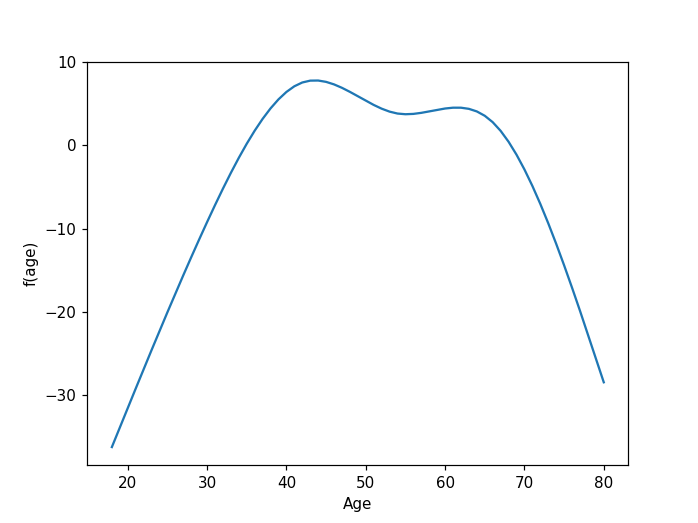

In [86]:
%matplotlib notebook
plt.plot(df_age['Age'], df_age['Fit Line'])
#plt.ylim(-30, 30)
plt.xlabel('Age')
plt.ylabel('f(age)')
plt.savefig('f_age.png', dpi = 100)

#### Plot Educational Level

In [92]:
f_edu_coeff = GA_model.params[1:5]
df_edu_col = dataset_dm.columns[1:5].tolist()

In [93]:
df_edu = dataset_dm[df_edu_col]
df_edu.head()

,education[T.2. HS Grad],education[T.3. Some College],education[T.4. College Grad],education[T.5. Advanced Degree]
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [94]:
df_edu['Fit Line'] = np.dot(df_edu.values, f_edu_coeff)

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
df_edu['Education'] = df.education

# Sort fit data by age
df_edu.sort_values(by = 'Education', inplace = True)
df_edu.head()

C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\u0125384\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,education[T.2. HS Grad],education[T.3. Some College],education[T.4. College Grad],education[T.5. Advanced Degree],Fit Line,Age,Education
0,0.0,0.0,0.0,0.0,0.0,18,1. < HS Grad
2981,0.0,0.0,0.0,0.0,0.0,52,1. < HS Grad
2109,0.0,0.0,0.0,0.0,0.0,41,1. < HS Grad
2869,0.0,0.0,0.0,0.0,0.0,33,1. < HS Grad
908,0.0,0.0,0.0,0.0,0.0,41,1. < HS Grad


<IPython.core.display.Javascript object>


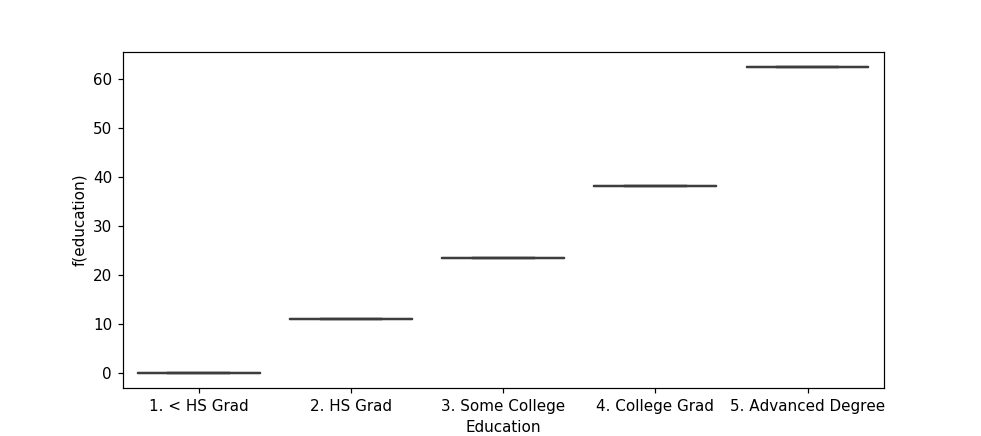

In [110]:
%matplotlib notebook
plt.figure(figsize = (9,4))
sns.boxplot(x = df_edu['Education'], y = df_edu['Fit Line'])
#plt.ylim(-30, 30)
plt.xlabel('Education')
plt.ylabel('f(education)')
plt.savefig('f_education.png', dpi = 100)

### ANOVA Test

In [111]:
"""We can perform a
series of ANOVA tests in order to determine which of these three models is
best: a GAM that excludes year (M1), a GAM that uses a linear function
of year (M2), or a GAM that uses a spline function of year (M3)."""

'We can perform a\nseries of ANOVA tests in order to determine which of these three models is\nbest: a GAM that excludes year (M1), a GAM that uses a linear function\nof year (M2), or a GAM that uses a spline function of year (M3).'

In [112]:
# Model M1
dataset1 = dmatrix("cr(age, df=5, constraints='center') + education",
                 data={"age":df.age, "education":df.education}, return_type="dataframe")

GA_model_1 = sm.OLS(df.wage, exog = dataset1).fit()

#Model M2
dataset2 = dmatrix("year + cr(age, df=5, constraints='center') + education",
                 data={"year":df.year, "age":df.age, "education":df.education}, return_type="dataframe")

GA_model_2 = sm.OLS(df.wage, exog = dataset2).fit()

# Model M3
dataset3 = dmatrix("cr(year, df=4, constraints='center') + cr(age, df=5, constraints='center') + education",
                 data={"year":df.year, "age":df.age, "education":df.education}, return_type="dataframe")

GA_model_3 = sm.OLS(df.wage, exog = dataset3).fit()

In [114]:
# Using ANOVA to compare models
sm.stats.anova_lm(GA_model_1, GA_model_2, GA_model_3)

C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\u0125384\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2990.0,3.712549e+06,0.0,NaN,NaN,NaN
1,2989.0,3.695015e+06,1.0,17534.011180,14.182511,0.000169
2,2986.0,3.691628e+06,3.0,3386.677223,0.913113,0.433717


In [116]:
# From ANOVA test we can say: year should be included but in linear form. Let's see summary of model M2:
GA_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          4.70e-216
Time:                        22:24:03   Log-Likelihood:                -14931.
No. Observations:                3000   AIC:                         2.988e+04
Df Residuals:                    2989   BIC:                         2.995e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -2316.2770    637.709     -3.632      0.000   -3566.670   -1065.884
education[T.2. HS Grad]                   11.0218      2.428      4.539      0.000       6.260      15.783
education[T.3. Some College]              23.5921      2.559      9.219      0.000      18.575      28.610
education[T.4. College Grad]              38.2053      2.544     15.018      0.000      33.217      43.194
education[T.5. Advanced Degree]           62.5466      2.761     22.658      0.000      57.134      67.959
year                                       1.1974      0.318      3.766      0.000       0.574       1.821
cr(age, df=5, constraints='center')[0]     7.7147      2.639      2.924      0.003       2.541      12.889
cr(age, df=5, constraints='center')[1]    31.0352      2.686     11.553      0.000      25.768      36.302
cr(age, df=5, constraints='center')[2]    20.7652      2.490      8.340      0.000      15.883      25.647
cr(age, df=5, constraints='center')[3]     6.0196      2.863      2.102      0.036       0.406      11.634
cr(age, df=5, constraints='center')[4]   -28.4506     11.296     -2.519      0.012     -50.599      -6.302
==============================================================================
Omnibus:                     1031.394   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5507.386
Skew:                           1.543   Prob(JB):                         0.00
Kurtosis:                       8.877   Cond. No.                     1.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""